In [1]:
from pathlib import Path
import pandas as pd
from typing import List, Optional
import cv2
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import sys

In [67]:
# First we load some dataset

Transformed = pd.read_feather(
    "/mnt/upramdya_data/MD/MultiMazeRecorder/Datasets/Coordinates/250106_Transformed_contact_data.feather"
)

In [68]:
Transformed

,duration,fly,start,end,start_frame,end_frame,x_Head_vel_mean,y_Head_vel_mean,x_Thorax_vel_mean,y_Thorax_vel_mean,...,Nickname,Brain region,Date,Genotype,Period,FeedingState,Orientation,Light,Crossing,contact_index
0,184,231115_TNT_Fine_1_Videos_Tracked_arena1_corridor1,1279.793103,1286.103448,37114,37297,0.001616,-0.043008,0.003151,-0.043170,...,"JON-AB\nJO-15""",JON,231115,TNTxG53,PM14,starved_noWater,std,on,1,0
1,88,231115_TNT_Fine_1_Videos_Tracked_arena1_corridor1,1319.103448,1322.103448,38254,38341,-0.051792,-0.047428,-0.044441,-0.048143,...,"JON-AB\nJO-15""",JON,231115,TNTxG53,PM14,starved_noWater,std,on,1,1
2,63,231115_TNT_Fine_1_Videos_Tracked_arena1_corridor2,3385.379310,3387.517241,98176,98238,-0.124783,-0.115754,-0.010349,-0.113173,...,"JON-AB\nJO-15""",JON,231115,TNTxG53,PM14,starved_noWater,std,on,1,1
3,141,231115_TNT_Fine_1_Videos_Tracked_arena1_corridor1,2037.862069,2042.689655,59098,59238,-0.054073,-0.166326,-0.027742,-0.164995,...,"JON-AB\nJO-15""",JON,231115,TNTxG53,PM14,starved_noWater,std,on,1,3
4,72,231115_TNT_Fine_1_Videos_Tracked_arena1_corridor1,2885.413793,2887.862069,83677,83748,0.043971,-0.175265,0.047137,-0.174998,...,"JON-AB\nJO-15""",JON,231115,TNTxG53,PM14,starved_noWater,std,on,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283021,492,240221_TNT_Fine_3_Videos_Tracked_arena3_corridor6,3481.758621,3498.689655,100971,101462,0.016481,0.017280,0.001885,0.023716,...,51969 (Capa-GAL4 4F),Neuropeptide,240221,TNTxZ1678,PM16,starved_noWater,std,on,1,116
283022,100,240221_TNT_Fine_3_Videos_Tracked_arena3_corridor6,3513.000000,3516.413793,101877,101976,0.000042,-0.114935,-0.002772,-0.082216,...,51969 (Capa-GAL4 4F),Neuropeptide,240221,TNTxZ1678,PM16,starved_noWater,std,on,1,117
283023,96,240221_TNT_Fine_3_Videos_Tracked_arena3_corridor6,3536.310345,3539.586207,102553,102648,0.083401,-0.039167,0.045935,-0.038045,...,51969 (Capa-GAL4 4F),Neuropeptide,240221,TNTxZ1678,PM16,starved_noWater,std,on,1,118
283024,470,240221_TNT_Fine_3_Videos_Tracked_arena3_corridor6,3550.034483,3566.206897,102951,103420,-0.001300,-0.017335,-0.000234,-0.017562,...,51969 (Capa-GAL4 4F),Neuropeptide,240221,TNTxZ1678,PM16,starved_noWater,std,on,1,119


In [69]:
for col in Transformed.columns:
    print(col)

duration
fly
start
end
start_frame
end_frame
x_Head_vel_mean
y_Head_vel_mean
x_Thorax_vel_mean
y_Thorax_vel_mean
x_Abdomen_vel_mean
y_Abdomen_vel_mean
x_Rfront_vel_mean
y_Rfront_vel_mean
x_Lfront_vel_mean
y_Lfront_vel_mean
x_Rmid_vel_mean
y_Rmid_vel_mean
x_Lmid_vel_mean
y_Lmid_vel_mean
x_Rhind_vel_mean
y_Rhind_vel_mean
x_Lhind_vel_mean
y_Lhind_vel_mean
x_Rwing_vel_mean
y_Rwing_vel_mean
x_Lwing_vel_mean
y_Lwing_vel_mean
x_centre_vel_mean
y_centre_vel_mean
x_centre_preprocessed_vel_mean
y_centre_preprocessed_vel_mean
x_Head_vel_std
y_Head_vel_std
x_Thorax_vel_std
y_Thorax_vel_std
x_Abdomen_vel_std
y_Abdomen_vel_std
x_Rfront_vel_std
y_Rfront_vel_std
x_Lfront_vel_std
y_Lfront_vel_std
x_Rmid_vel_std
y_Rmid_vel_std
x_Lmid_vel_std
y_Lmid_vel_std
x_Rhind_vel_std
y_Rhind_vel_std
x_Lhind_vel_std
y_Lhind_vel_std
x_Rwing_vel_std
y_Rwing_vel_std
x_Lwing_vel_std
y_Lwing_vel_std
x_centre_vel_std
y_centre_vel_std
x_centre_preprocessed_vel_std
y_centre_preprocessed_vel_std
x_Head_acc_mean
y_Head_acc_me

In [3]:
# Then we isolate flies from a certain Nickname

Nickname_list = [
    "34497 (MZ19-GAL4)",
    "DDC-gal4",
    "Ple-Gal4.F a.k.a TH-Gal4",
    "MB504B (All PPL1)",
    "VT43924 (MB-APL)",
    "474 (MB-APL)",
]

In [4]:
#

MZ19 = Transformed[Transformed["Nickname"] == Nickname_list[0]]

MZ19

,duration,fly,start,end,start_frame,end_frame,x_Head_vel_mean,y_Head_vel_mean,x_Thorax_vel_mean,y_Thorax_vel_mean,...,Nickname,Brain region,Date,Genotype,Period,FeedingState,Orientation,Light,Crossing,contact_index
163937,77,231222_TNT_Fine_1_Videos_Tracked_arena5_corridor1,68.586207,71.206897,1989,2065,0.046656,0.039097,0.045864,-0.038457,...,34497 (MZ19-GAL4),Olfaction,231222,TNTxZ1659,PM14,starved_noWater,std,on,1,0
163938,95,231222_TNT_Fine_1_Videos_Tracked_arena5_corridor1,1818.793103,1822.034483,52745,52839,-0.074778,-0.001154,-0.005082,0.000299,...,34497 (MZ19-GAL4),Olfaction,231222,TNTxZ1659,PM14,starved_noWater,std,on,1,1
163939,77,231222_TNT_Fine_1_Videos_Tracked_arena5_corridor1,2083.586207,2086.206897,60424,60500,0.051746,0.049271,0.005226,0.050970,...,34497 (MZ19-GAL4),Olfaction,231222,TNTxZ1659,PM14,starved_noWater,std,on,1,3
163940,177,231222_TNT_Fine_1_Videos_Tracked_arena5_corridor1,2014.862069,2020.931034,58431,58607,0.019809,-0.022641,0.000815,-0.007631,...,34497 (MZ19-GAL4),Olfaction,231222,TNTxZ1659,PM14,starved_noWater,std,on,1,2
163941,87,231222_TNT_Fine_1_Videos_Tracked_arena5_corridor1,2451.551724,2454.517241,71095,71181,-0.003304,0.045451,-0.004172,0.043693,...,34497 (MZ19-GAL4),Olfaction,231222,TNTxZ1659,PM14,starved_noWater,std,on,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177130,74,231222_TNT_Fine_3_Videos_Tracked_arena8_corridor5,3557.413793,3559.931034,103165,103238,0.001057,-0.005312,-0.003912,-0.006520,...,34497 (MZ19-GAL4),Olfaction,231222,TNTxZ1659,PM16,starved_noWater,std,on,1,141
177131,77,231222_TNT_Fine_3_Videos_Tracked_arena8_corridor5,3574.448276,3577.068966,103659,103735,0.050878,-0.055058,0.006448,-0.090892,...,34497 (MZ19-GAL4),Olfaction,231222,TNTxZ1659,PM16,starved_noWater,std,on,1,142
177132,71,231222_TNT_Fine_3_Videos_Tracked_arena8_corridor5,3592.068966,3594.482759,104170,104240,0.049011,-0.010403,0.099780,-0.008322,...,34497 (MZ19-GAL4),Olfaction,231222,TNTxZ1659,PM16,starved_noWater,std,on,1,143
177133,99,231222_TNT_Fine_3_Videos_Tracked_arena8_corridor6,310.275862,313.655172,8998,9096,0.043979,-0.036075,0.039559,-0.038406,...,34497 (MZ19-GAL4),Olfaction,231222,TNTxZ1659,PM16,starved_noWater,std,on,1,0


In [5]:
# Get all unique values of "flypath" 

MZ19["flypath"].unique()

array(['/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor1',
       '/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor2',
       '/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor3',
       '/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor4',
       '/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor5',
       '/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor6',
       '/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_2_Videos_Tracked/arena8/corridor1',
       '/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_2_Videos_Tracked/arena8/corridor2',
       '/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_2_Videos_Tracked/arena8/corridor3',
       '/mnt/upramdya_data/MD/MultiMa

In [6]:
# Each flypath is a directory. Find the .mp4 file with "preprocessed" in the name in each directory

for flypath in MZ19["flypath"].unique():
    print(
        list(
            Path(flypath).glob(
                "*preprocessed*.mp4"
            )
        )
    )
    
    

[PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor1/corridor1_preprocessed.mp4')]
[PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor2/corridor2_preprocessed.mp4')]
[PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor3/corridor3_preprocessed.mp4')]
[PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor4/corridor4_preprocessed.mp4')]
[PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor5/corridor5_preprocessed.mp4')]
[PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor6/corridor6_preprocessed.mp4')]
[PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_2_Videos_Tracked/arena8/corridor1/corridor1_preprocessed.mp4')]
[PosixPath('/mnt/upramdya_d

In [ ]:
# Now use moviepy to make a grid of all the videos in one row

from moviepy.editor import VideoFileClip, clips_array

# Get all the videos in one row

videos = []

for flypath in MZ19["flypath"].unique():
    
    video = list(
            Path(flypath).glob(
                "*preprocessed*.mp4"
            )
        )
    
    if len(video) > 0:
        video = video[0]
        videos.append(VideoFileClip(str(video)))
        
# Make a grid of all the videos

clips_array([videos])


In [7]:
def generate_identifiers(data: pd.DataFrame, video_paths: List[Path]) -> List[str]:
    """Generate identifiers for each video based on the directory structure and dataset."""
    identifiers = []
    for path in video_paths:
        if path:
            corridor = path.parent.name
            arena = path.parent.parent.name
            date = data.loc[data["flypath"] == str(path.parent), "Date"].values[0]
            identifier = f"{date} \n {arena} \n {corridor}"
            identifiers.append(identifier)
        else:
            identifiers.append("Unknown")
    return identifiers

NameError: name 'List' is not defined

In [45]:
# Constants
DATA_PATH = "/mnt/upramdya_data/MD/MultiMazeRecorder/Datasets/Coordinates/250106_Transformed_contact_data.feather"
NICKNAME_LIST = [
    "34497 (MZ19-GAL4)",
    "DDC-gal4",
    "Ple-Gal4.F a.k.a TH-Gal4",
    "MB504B (All PPL1)",
    "VT43924 (MB-APL)",
    "474 (MB-APL)",
]
OUTPUT_DIR = (
    "/mnt/upramdya_data/MD/Other_Videos/"  # Specify your desired output directory here
)


def load_dataset(file_path: str) -> pd.DataFrame:
    """Load dataset from feather file."""
    try:
        return pd.read_feather(file_path)
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return pd.DataFrame()


def filter_by_nickname(data: pd.DataFrame, nickname: str) -> pd.DataFrame:
    """Filter dataset by nickname."""
    if "Nickname" not in data.columns:
        print("Error: 'Nickname' column not found in dataset.")
        return pd.DataFrame()
    return data.loc[data["Nickname"] == nickname]


def get_video_paths(flypaths: List[str], preprocessed: bool = False) -> List[Path]:
    """Get paths of videos, either preprocessed or non-preprocessed."""
    video_paths = []
    for flypath in flypaths:
        path = Path(flypath)
        if preprocessed:
            video = next(path.glob("*preprocessed*.mp4"), None)
        else:
            video = next(
                (p for p in path.glob("*.mp4") if "preprocessed" not in p.name), None
            )
        video_paths.append(video)
    return video_paths


def load_video(path: Path) -> Optional[cv2.VideoCapture]:
    """Load a single video clip."""
    if path and path.exists():
        try:
            cap = cv2.VideoCapture(str(path))
            if cap.isOpened():
                print(f"Successfully loaded video: {path}")
                return cap
            else:
                print(f"Error opening video {path}")
        except Exception as e:
            print(f"Error loading video {path}: {e}")
    else:
        print(f"Invalid or non-existent path: {path}")
    return None


def load_videos(video_paths: List[Path]) -> List[cv2.VideoCapture]:
    """Load video clips in parallel."""
    with ThreadPoolExecutor() as executor:
        videos = list(executor.map(load_video, video_paths))
    return [video for video in videos if video is not None]


def generate_identifiers(data: pd.DataFrame, video_paths: List[Path]) -> List[str]:
    """Generate identifiers for each video based on the directory structure and dataset."""
    identifiers = []
    for path in video_paths:
        if path:
            corridor = path.parent.name
            arena = path.parent.parent.name
            date = data.loc[data["flypath"] == str(path.parent), "Date"].values[0]
            identifier = f"{date}\n{arena}\n{corridor}"
            identifiers.append(identifier)
        else:
            identifiers.append("Unknown")
    return identifiers

In [63]:
def add_identifier(
    frame: np.ndarray, identifier: str, position="bottom", padding=20
) -> np.ndarray:
    """Add identifier text to a frame using CUDA."""
    gpu_frame = cv2.cuda_GpuMat()
    gpu_frame.upload(frame)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5  # Reduced font size
    color = (255, 255, 255)
    thickness = 1
    line_height = int(cv2.getTextSize("A", font, font_scale, thickness)[0][1] * 1.5)

    frame = gpu_frame.download()
    if position == "bottom":
        y0 = frame.shape[0] - padding - (len(identifier.split("\n")) - 1) * line_height
    else:
        y0 = padding + line_height

    for i, line in enumerate(identifier.split("\n")):
        y = y0 + i * line_height
        cv2.putText(
            frame, line, (10, y), font, font_scale, color, thickness, cv2.LINE_AA
        )
    gpu_frame.upload(frame)
    return gpu_frame.download()


def create_video_grid_frame(
    videos: List[cv2.VideoCapture],
    identifiers: List[str],
    horizontal_padding=10,
    vertical_padding=30,
    top_padding=50,
    bottom_padding=50,
    grid_text="Video Grid Information",
) -> Optional[np.ndarray]:
    """Create a single frame of a grid of videos with identifiers and features using CUDA."""
    if not videos:
        print("No videos to create grid.")
        return None

    # Get the properties of each video
    widths = [int(video.get(cv2.CAP_PROP_FRAME_WIDTH)) for video in videos]
    heights = [int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)) for video in videos]

    print(widths)
    print(heights)

    # Calculate the maximum width and height to ensure even placement
    max_width = max(widths)
    max_height = max(heights)

    # Calculate new dimensions with padding
    new_width = max_width * len(videos) + horizontal_padding * (len(videos) + 1)
    new_height = max_height + top_padding + bottom_padding + 2 * vertical_padding

    # Create a blank grid frame with padding
    grid_frame = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Add title at the top
    cv2.putText(
        grid_frame,
        grid_text,
        (horizontal_padding, top_padding - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (255, 255, 255),
        2,
        cv2.LINE_AA,
    )

    # Add video frames to the grid with padding
    x_offsets = []
    for i, video in enumerate(videos):
        x_offset = horizontal_padding * (i + 1) + max_width * i
        x_offsets.append(x_offset)

        ret, frame = video.read()
        if not ret:
            print(f"Could not read frame from video {i}")
            continue

        # if the height is bigger than 510, remove any extra pixels from the bottom and modify the corresponding height
        if frame.shape[0] > 510:
            frame = frame[:510, :, :]
            heights[i] = 510

        # Resize the frame to the maximum width while maintaining aspect ratio
        aspect_ratio = frame.shape[1] / frame.shape[0]
        new_frame_width = max_width
        new_frame_height = int(new_frame_width / aspect_ratio)
        frame = cv2.resize(frame, (new_frame_width, new_frame_height))

        # Calculate y_offset to align the bottom of the frames
        y_offset = top_padding + vertical_padding + (max_height - new_frame_height)

        # Place the frame in the grid
        grid_frame[
            y_offset : y_offset + new_frame_height,
            x_offset : x_offset + new_frame_width,
        ] = frame

    # Add identifiers below each video after placing all frames
    for i, identifier in enumerate(identifiers):
        x_offset = x_offsets[i]
        identifier_y_start = (
            top_padding + vertical_padding + max_height + vertical_padding
        )

        for j, line in enumerate(identifier.split("\n")):
            y_position = identifier_y_start + j * 20  # Line spacing
            cv2.putText(
                grid_frame,
                line,
                (x_offset + 10, y_position),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (255, 255, 255),
                1,
                cv2.LINE_AA,
            )

    return grid_frame


def display_grid_frame(grid_frame: np.ndarray):
    """Display a single frame of the video grid using matplotlib."""
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(grid_frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

Successfully loaded video: /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor1/corridor1.mp4
Successfully loaded video: /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor2/corridor2.mp4
Successfully loaded video: /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor4/corridor4.mp4
Successfully loaded video: /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_1_Videos_Tracked/arena5/corridor6/corridor6.mp4
Successfully loaded video: /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_2_Videos_Tracked/arena8/corridor2/corridor2.mp4
Successfully loaded video: /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_2_Videos_Tracked/arena8/corridor4/corridor4.mp4
Successfully loaded video: /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/231222_TNT_Fine_2_Videos_Tracked/arena8/corridor6/corridor6.mp4
Successfully loaded video: /mnt/up

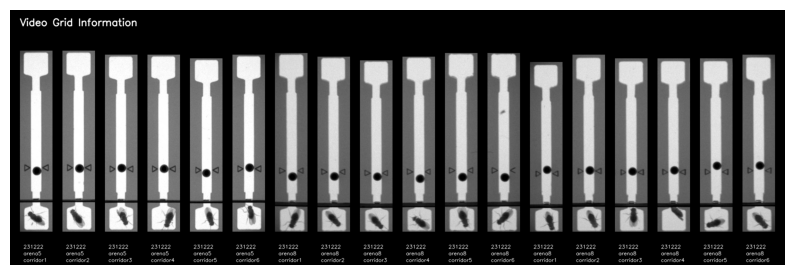

Grid frame created successfully.


In [66]:
def main(test=False):
    transformed_data = load_dataset(DATA_PATH)
    if transformed_data.empty:
        return

    mz19_data = filter_by_nickname(transformed_data, NICKNAME_LIST[0])
    if mz19_data.empty:
        return

    flypaths = mz19_data["flypath"].unique()
    video_paths = get_video_paths(flypaths, preprocessed=False)
    videos = load_videos(video_paths)

    print(f"Number of valid videos loaded: {len(videos)}")

    if not videos:
        print("No valid videos were loaded. Exiting.")
        return

    if test:
        # Trim videos to 20 seconds for testing
        for video in videos:
            video.set(cv2.CAP_PROP_POS_FRAMES, 0)
            video.set(
                cv2.CAP_PROP_FRAME_COUNT,
                min(
                    10 * int(video.get(cv2.CAP_PROP_FPS)),
                    int(video.get(cv2.CAP_PROP_FRAME_COUNT)),
                ),
            )

    identifiers = generate_identifiers(mz19_data, video_paths)
    grid_frame = create_video_grid_frame(
        videos,
        identifiers,
        horizontal_padding=30,
        vertical_padding=50,
        top_padding=60,
        bottom_padding=50,
    )

    if grid_frame is not None:
        display_grid_frame(grid_frame)
        print("Grid frame created successfully.")


if __name__ == "__main__":
    main(test=True)